# Analisi approfondita dei datasets del progetto di IUM

In [ ]:
# import librerie per una prima analisi dei dati

import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

### funzione ausiliare che stampa il conteggio nei grafici a barre

In [1]:
# Add count values on top of each bar
def add_count_on_bars(ax):
    # Add count values on top of each bar
    for p in ax.patches:
     ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

##### Lettura del dataset

In [2]:
movies_df = pd.read_csv("Main_data/movies.csv")

NameError: name 'pd' is not defined

## Fase di ispezione dei dati

In [ ]:
# una prima ispezione dei dati ci permette di capire come è strutturato il dataset e quanti elementi contiene
print(movies_df.shape)
print(movies_df.columns)
print(movies_df.dtypes)
movies_df.head(10)


(941597, 7)
Index(['id', 'name', 'date', 'tagline', 'description', 'minute', 'rating'], dtype='object')
id               int64
name            object
date           float64
tagline         object
description     object
minute         float64
rating         float64
dtype: object


,id,name,date,tagline,description,minute,rating
0,1000001,Barbie,2023.0,She's everything. He's just Ken.,Barbie and Ken are having the time of their li...,114.0,3.86
1,1000002,Parasite,2019.0,Act like you own the place.,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56
2,1000003,Everything Everywhere All at Once,2022.0,The universe is so much bigger than you realize.,An aging Chinese immigrant is swept up in an i...,140.0,4.30
3,1000004,Fight Club,1999.0,Mischief. Mayhem. Soap.,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27
4,1000005,La La Land,2016.0,Here's to the fools who dream.,"Mia, an aspiring actress, serves lattes to mov...",129.0,4.09
5,1000006,Oppenheimer,2023.0,The world forever changes.,The story of J. Robert Oppenheimer's role in t...,181.0,4.23
6,1000007,Interstellar,2014.0,Mankind was born on Earth. It was never meant ...,The adventures of a group of explorers who mak...,169.0,4.35
7,1000008,Joker,2019.0,Put on a happy face.,"During the 1980s, a failed stand-up comedian i...",122.0,3.85
8,1000009,Dune,2021.0,"Beyond fear, destiny awaits.","Paul Atreides, a brilliant and gifted young ma...",155.0,3.90
9,1000010,Pulp Fiction,1994.0,Just because you are a character doesn't mean ...,"A burger-loving hit man, his philosophical par...",154.0,4.26


##### modifichiamo il tipo di alcune colonne

In [ ]:
movies_df["name"] = movies_df["name"].astype("string")
movies_df["date"] = movies_df["date"].astype("Int64")
movies_df.head()

,id,name,date,tagline,description,minute,rating
0,1000001,Barbie,2023,She's everything. He's just Ken.,Barbie and Ken are having the time of their li...,114.0,3.86
1,1000002,Parasite,2019,Act like you own the place.,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56
2,1000003,Everything Everywhere All at Once,2022,The universe is so much bigger than you realize.,An aging Chinese immigrant is swept up in an i...,140.0,4.30
3,1000004,Fight Club,1999,Mischief. Mayhem. Soap.,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27
4,1000005,La La Land,2016,Here's to the fools who dream.,"Mia, an aspiring actress, serves lattes to mov...",129.0,4.09


##### controlliamo i valori nulli presenti nel dataset per ogni colonna rilevante 

In [ ]:
# decidere se eliminare dei valori nulli o normalizzarli

print(f"ci sono {movies_df['id'].isnull().sum()} film con dei valori nulli per il id")

print(f"ci sono {movies_df['name'].isnull().sum()} film con dei valori nulli per il titolo")

print(f"ci sono {movies_df['date'].isnull().sum()} film con dei valori nulli per data")

print(f"ci sono {movies_df['minute'].isnull().sum()} film con dei valori nulli per il minutaggio")

print(f"ci sono {movies_df['rating'].isnull().sum()} film con dei valori nulli per il rating")

ci sono 0 film con dei valori nulli per il id
ci sono 7 film con dei valori nulli per il titolo
ci sono 91913 film con dei valori nulli per data
ci sono 181570 film con dei valori nulli per il minutaggio
ci sono 850598 film con dei valori nulli per il rating


##### Riduciamo il dataset per mantenere le informazioni importanti

In [ ]:
movies_df = movies_df[["id", "name", "date", "description", "minute", "rating"]]
movies_df.head()

,id,name,date,description,minute,rating
0,1000001,Barbie,2023,Barbie and Ken are having the time of their li...,114.0,3.86
1,1000002,Parasite,2019,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56
2,1000003,Everything Everywhere All at Once,2022,An aging Chinese immigrant is swept up in an i...,140.0,4.30
3,1000004,Fight Club,1999,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27
4,1000005,La La Land,2016,"Mia, an aspiring actress, serves lattes to mov...",129.0,4.09


## Fase di analisi dei dati

In [ ]:
# analisi preliminare
movies_df.describe()

,id,date,minute,rating
count,9.415970e+05,849684.000000,760027.000000,90999.000000
mean,1.470799e+06,1998.522300,65.776516,3.244043
std,2.718158e+05,27.534865,154.828161,0.417281
min,1.000001e+06,1874.000000,1.000000,0.880000
25%,1.235400e+06,1986.000000,15.000000,3.020000
50%,1.470799e+06,2010.000000,62.000000,3.300000
75%,1.706198e+06,2019.000000,92.000000,3.510000
max,1.941597e+06,2031.000000,72000.000000,4.690000


In [ ]:
# da subito notiamo che alcuni film riportano una durata massima di 72000 minuti. potremmo essere in presenza di alcuni outliesr
# vediamo quanti film superano una certa soglia e quali film superano questo minutaggio
movies_df.loc[movies_df["minute"] > 10000]["id"].count()
movies_df.loc[movies_df["minute"] > 10000]

# dopo un'attenta analisi, il dataset non presenta outliers, anche se nel dataset sono presenti delle serie tv che, per ovvie ragioni, 
# hanno una maggior durata dei film, incontriamo comunque dei film con un minutaggio totale fuori dal comune 


,id,name,date,description,minute,rating
27643,1027644,Logistics,2011,Logistics or Logistics Art Project is an exper...,51420.0,3.28
72276,1072277,Cinématon,1978,Cinématon is a 156-hour long experimental film...,12480.0,NaN
94545,1094546,Modern Times Forever,2011,"The film shows centuries of decay, compressed ...",14400.0,NaN
193178,1193179,Al Zeer Salem,2000,A historical series embodying the character of...,72000.0,NaN
321049,1321050,Svalbard minutt for minutt,2020,A documentary trying to relive the 10 days of ...,13319.0,NaN
451305,1451306,Eighteen Springs,2002,Eighteen Springs (also known as Affair of Half...,58800.0,NaN


minute_range
0-30          287251
30-60          89095
60-90         183466
90-120        146790
120-180        39241
180-240         4686
240-1000        7933
1000-10000      1559
10000+             6
Name: id, dtype: int64


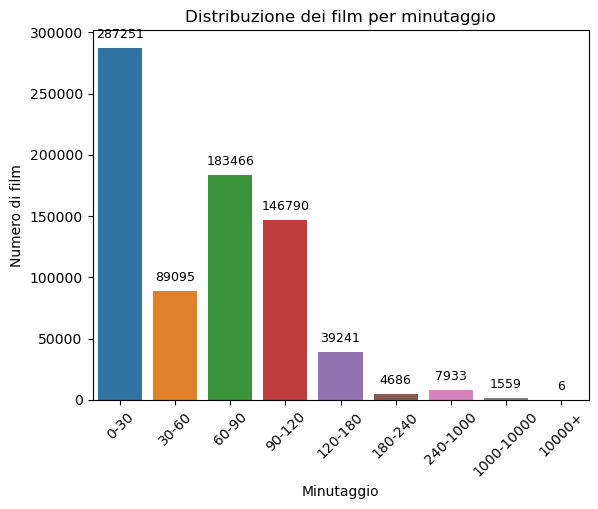

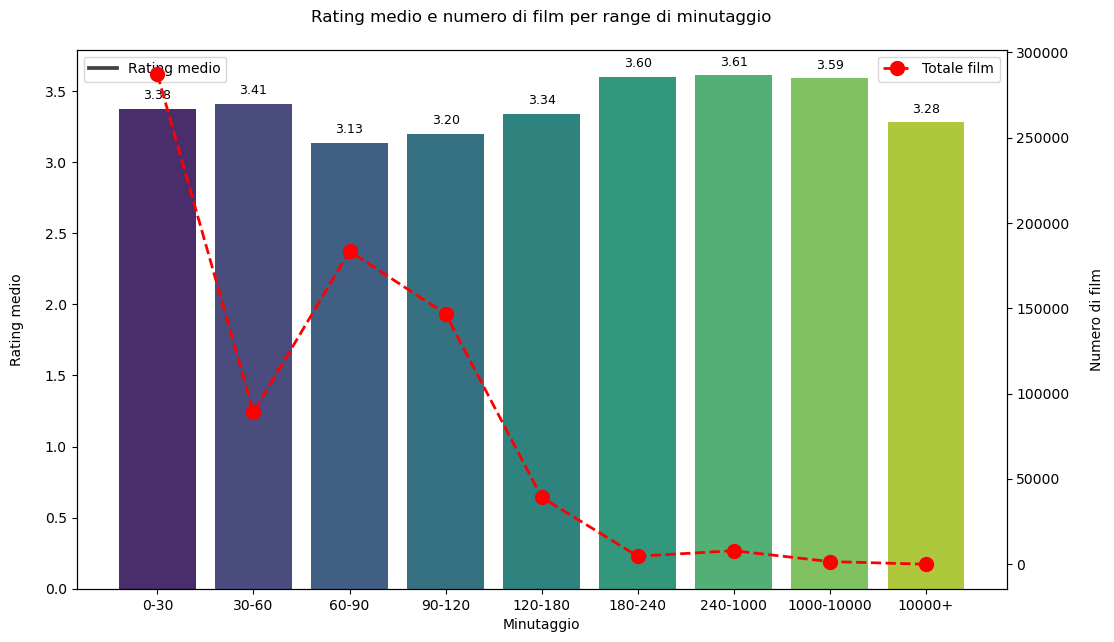

1874
2031


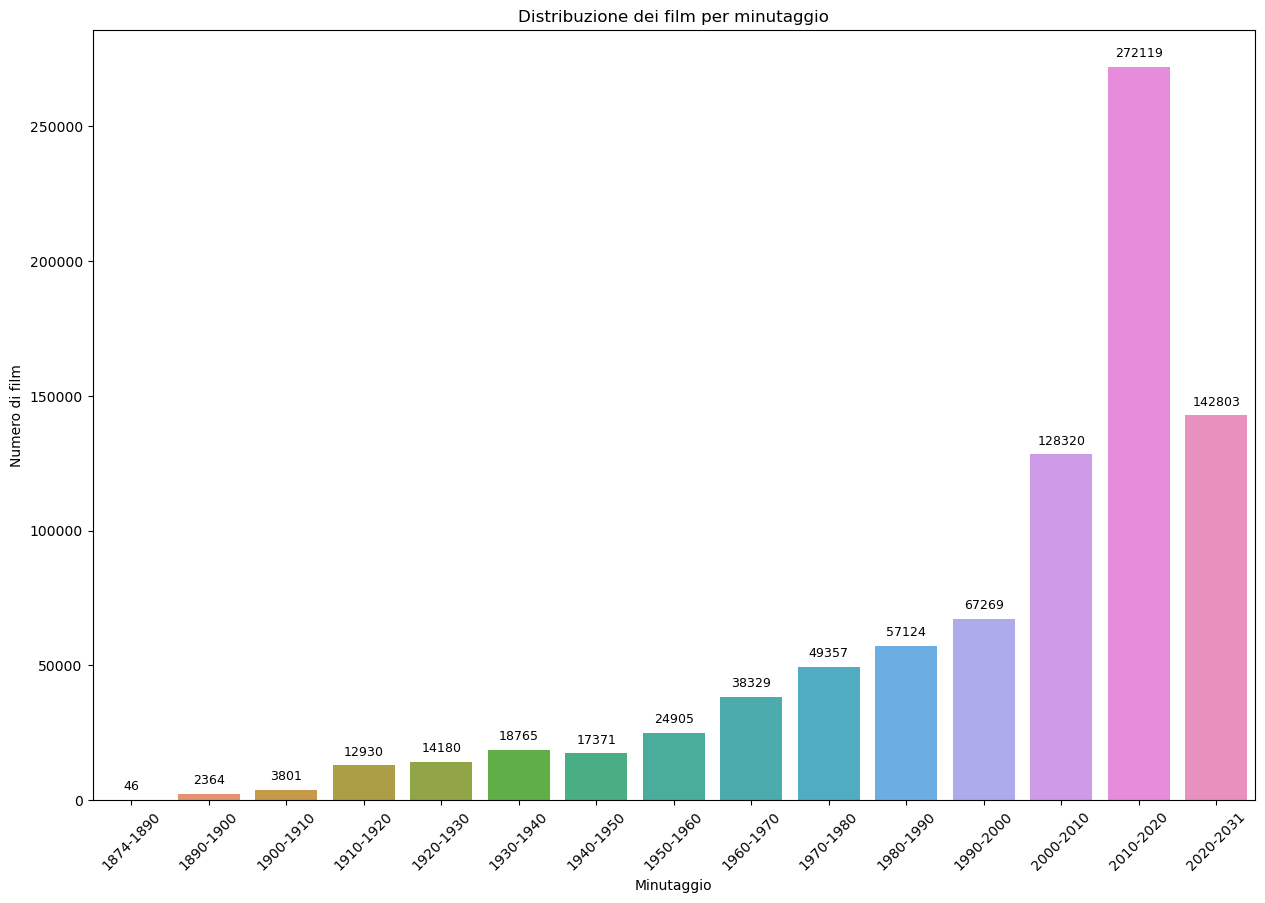

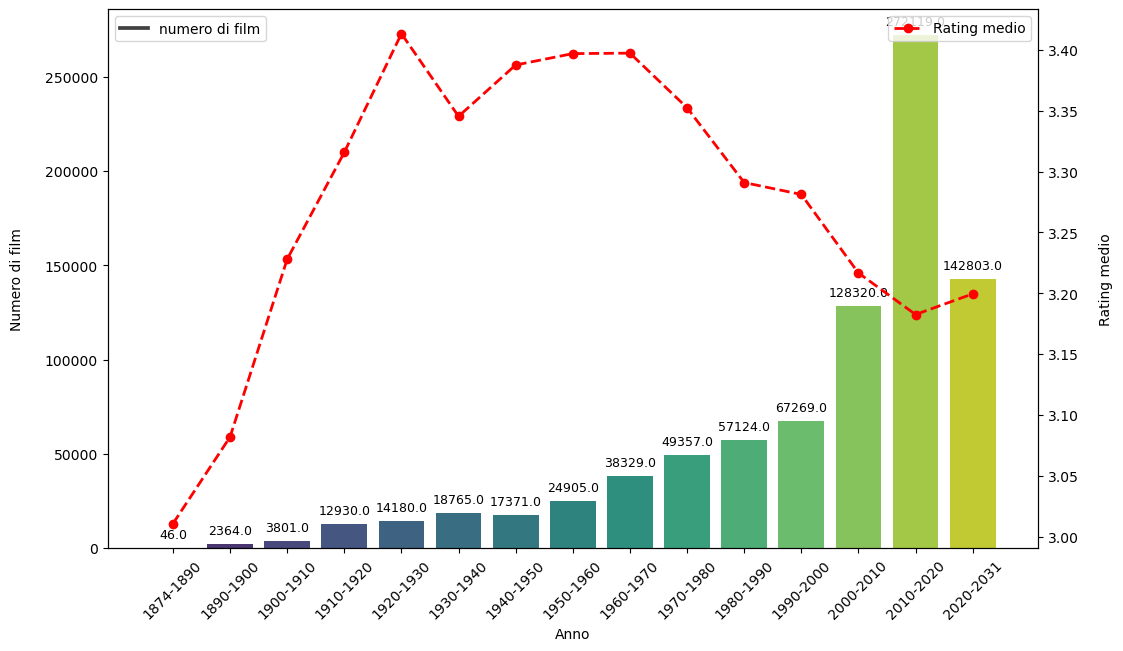